In [4]:
%config InlineBackend.figure_format = 'retina'

from glob import glob
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import *
from scipy.stats import ttest_ind
from matplotlib import pyplot
import seaborn as sns
import os
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.sans-serif"] = "Arial"

from matplotlib import gridspec,cm
from scipy import stats as ss
import tqdm 

In [2]:
sampleinfo = pd.read_csv('/home/luosongwen/scantecc/2025_new_data/refined_metadata.csv',sep='\t')
sampleinfo.index = sampleinfo["id"]

In [3]:
sampleinfo

,type,cancer,label,Age,Gender,Pathological_Stage,Simplified_Stage,ctype,id
id,,,,,,,,,
HG603,卵巢腺癌,卵巢癌,Disease,58,female,IIIC期,3,Ovarian,HG603
HG171,卵巢恶,卵巢癌,Disease,77,female,ⅢC期,3,Ovarian,HG171
HG92,卵巢癌,卵巢癌,Disease,52,female,ⅡC,2,Ovarian,HG92
HG401,左肺小细胞癌,肺癌,Disease,58,male,ED期,ED,Lung,HG401
HG79,双侧卵巢恶性肿瘤术后复发,卵巢癌,Disease,54,female,NaN,4,Ovarian,HG79
...,...,...,...,...,...,...,...,...,...
SE-60,正常对照,正常对照,Normal,41,男,NaN,NaN,Healthy,SE-60
SE-48,正常对照,正常对照,Normal,44,女,NaN,NaN,Healthy,SE-48
SE-141,正常对照,正常对照,Normal,47,女,NaN,NaN,Healthy,SE-141


### sFigure2C Size distribution density of cell-free eccDNA in healthy individuals (blue) and cancer patients

In [5]:
indir = '/home/luosongwen/scantecc/2025_new_data/Scantecc_eccDNA_txt/'

allsampleFragtemp = []

for indx in tqdm.tqdm(sampleinfo.index):
    tempHG = pd.read_csv(indir+indx+'.txt',sep='\t',header=0)
    tempHG['id'] = indx
    #tempHG['type0'] = sampleinfo.loc[indx,'type0']
    #tempHG['typeacc'] = sampleinfo.loc[indx,'typeacc']
    tempHG['length'] = tempHG['end'] - tempHG['start']

    allsampleFragtemp.append(tempHG)
    
allsampleFrag=pd.concat([x for x in allsampleFragtemp],ignore_index=True) 

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 652/652 [00:36<00:00, 18.05it/s]


In [6]:
allsampleFrag = allsampleFrag[["chr","start","end","count","id","length"]]
sampleinfo.index.name = None
allsampleFrag = allsampleFrag.merge(sampleinfo[['id', 'label', 'ctype']], on='id', how='left')
allsampleFrag['label'] = allsampleFrag['label'].replace({'Disease': 'Cancer', 'Normal': 'Health'})
allsampleFrag.drop(allsampleFrag.loc[allsampleFrag['chr']=='chrM'].index, inplace = True)
allsampleFrag.reset_index(inplace=True)

In [7]:
allsampleCounttemp = []
allsampleCounttemp.append(allsampleFrag)
for countnumber in tqdm.trange(1,allsampleFrag['count'].max()+1):
    tempfragmentCount = allsampleFrag.loc[allsampleFrag['count']>countnumber]
    allsampleCounttemp.append(tempfragmentCount)
    
allsampleCount = pd.concat([x for x in allsampleCounttemp],ignore_index=True)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 233/233 [00:07<00:00, 32.90it/s]


In [8]:
allsampleCount_nor = allsampleCount.loc[allsampleCount['label']=='Health']

templengthCount_nor = pd.DataFrame(allsampleCount_nor['length'].value_counts() / len(allsampleCount_nor))
templengthCount_nor.columns=['Ratio']
templengthCount_nor.index.name='Length'
templengthCount_nor=templengthCount_nor.reset_index()

In [9]:
allsampleCount_dis = allsampleCount.loc[allsampleCount['label']=='Cancer']

templengthCount_dis = pd.DataFrame(allsampleCount_dis['length'].value_counts() / len(allsampleCount_dis))
templengthCount_dis.columns=['Ratio']
templengthCount_dis.index.name='Length'
templengthCount_dis=templengthCount_dis.reset_index()

## Draw

Text(0.5, 1.0, 'sFigure2C')

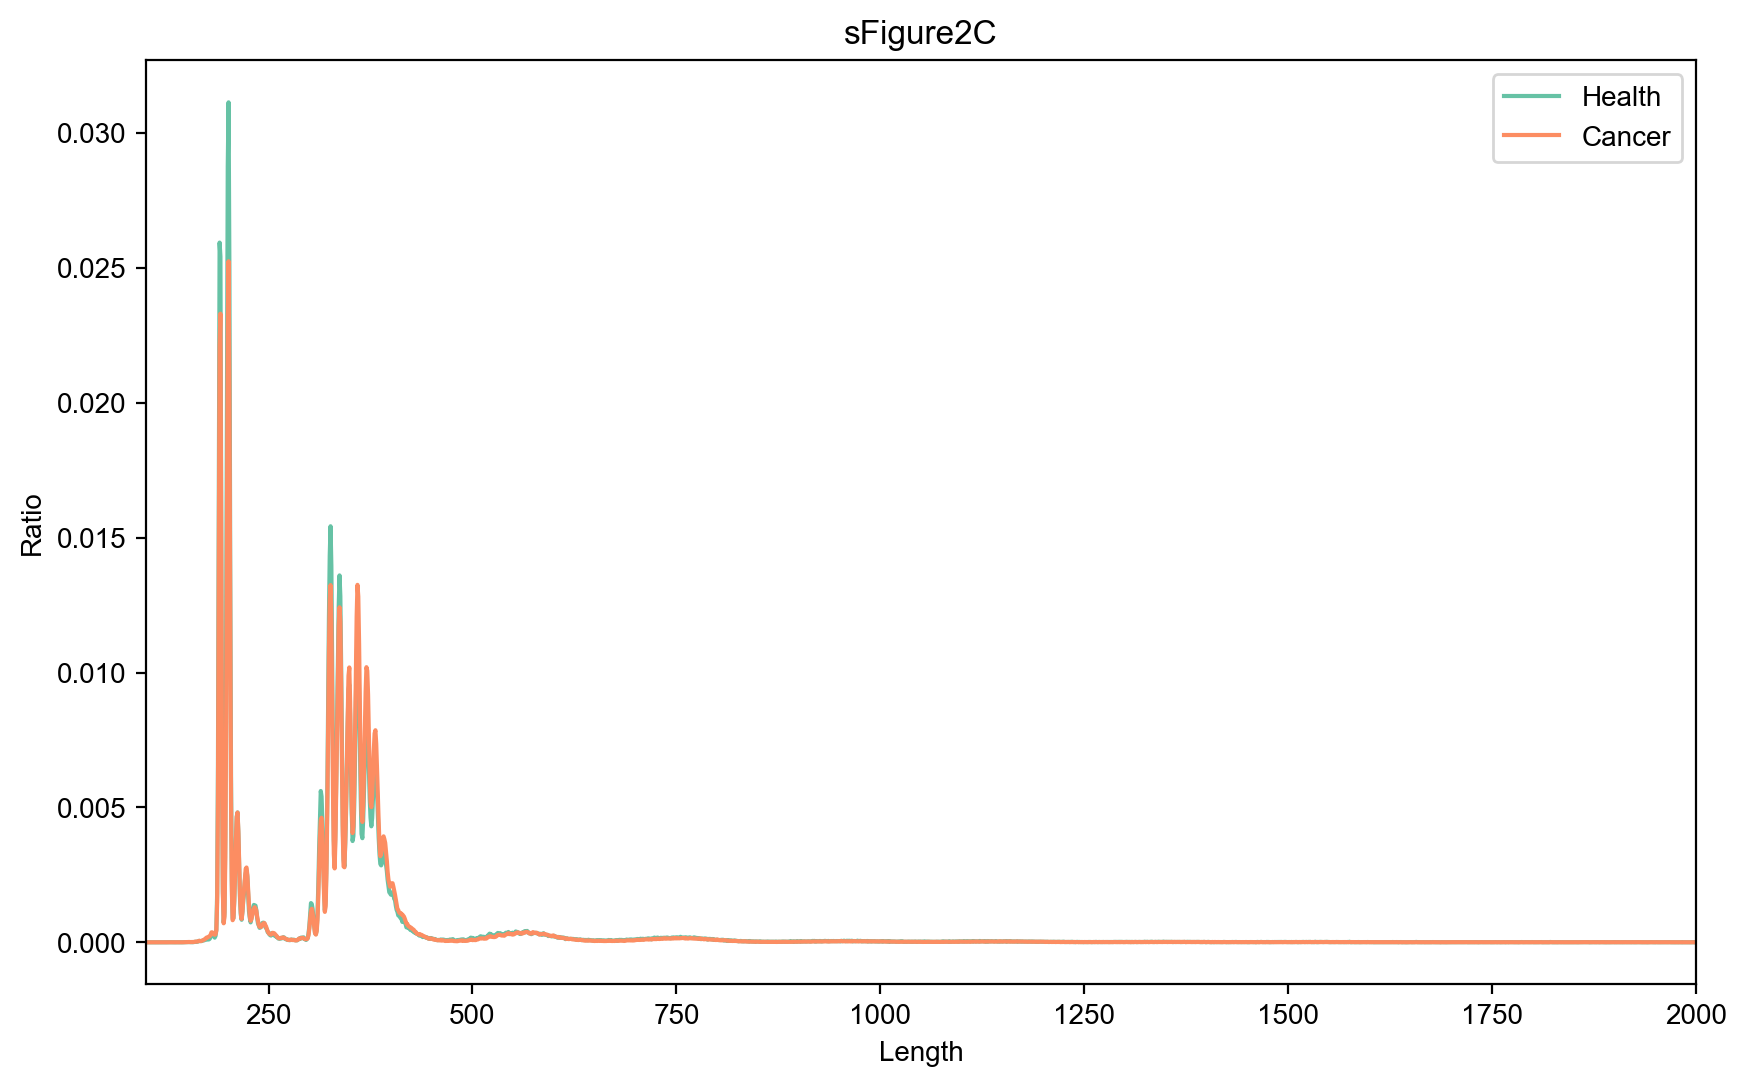

In [10]:
figsF2C = plt.figure(figsize = (10,6))
ax21 = plt.subplot(1,1,1)

sns.lineplot(data=templengthCount_nor,x="Length",y="Ratio",label='Health',ax = ax21,color='#66c2a5')
sns.lineplot(data=templengthCount_dis,x="Length",y="Ratio",label='Cancer',ax = ax21,color ='#fc8d62')
ax21.set_xlim([100, 2000])

plt.title("sFigure2C")

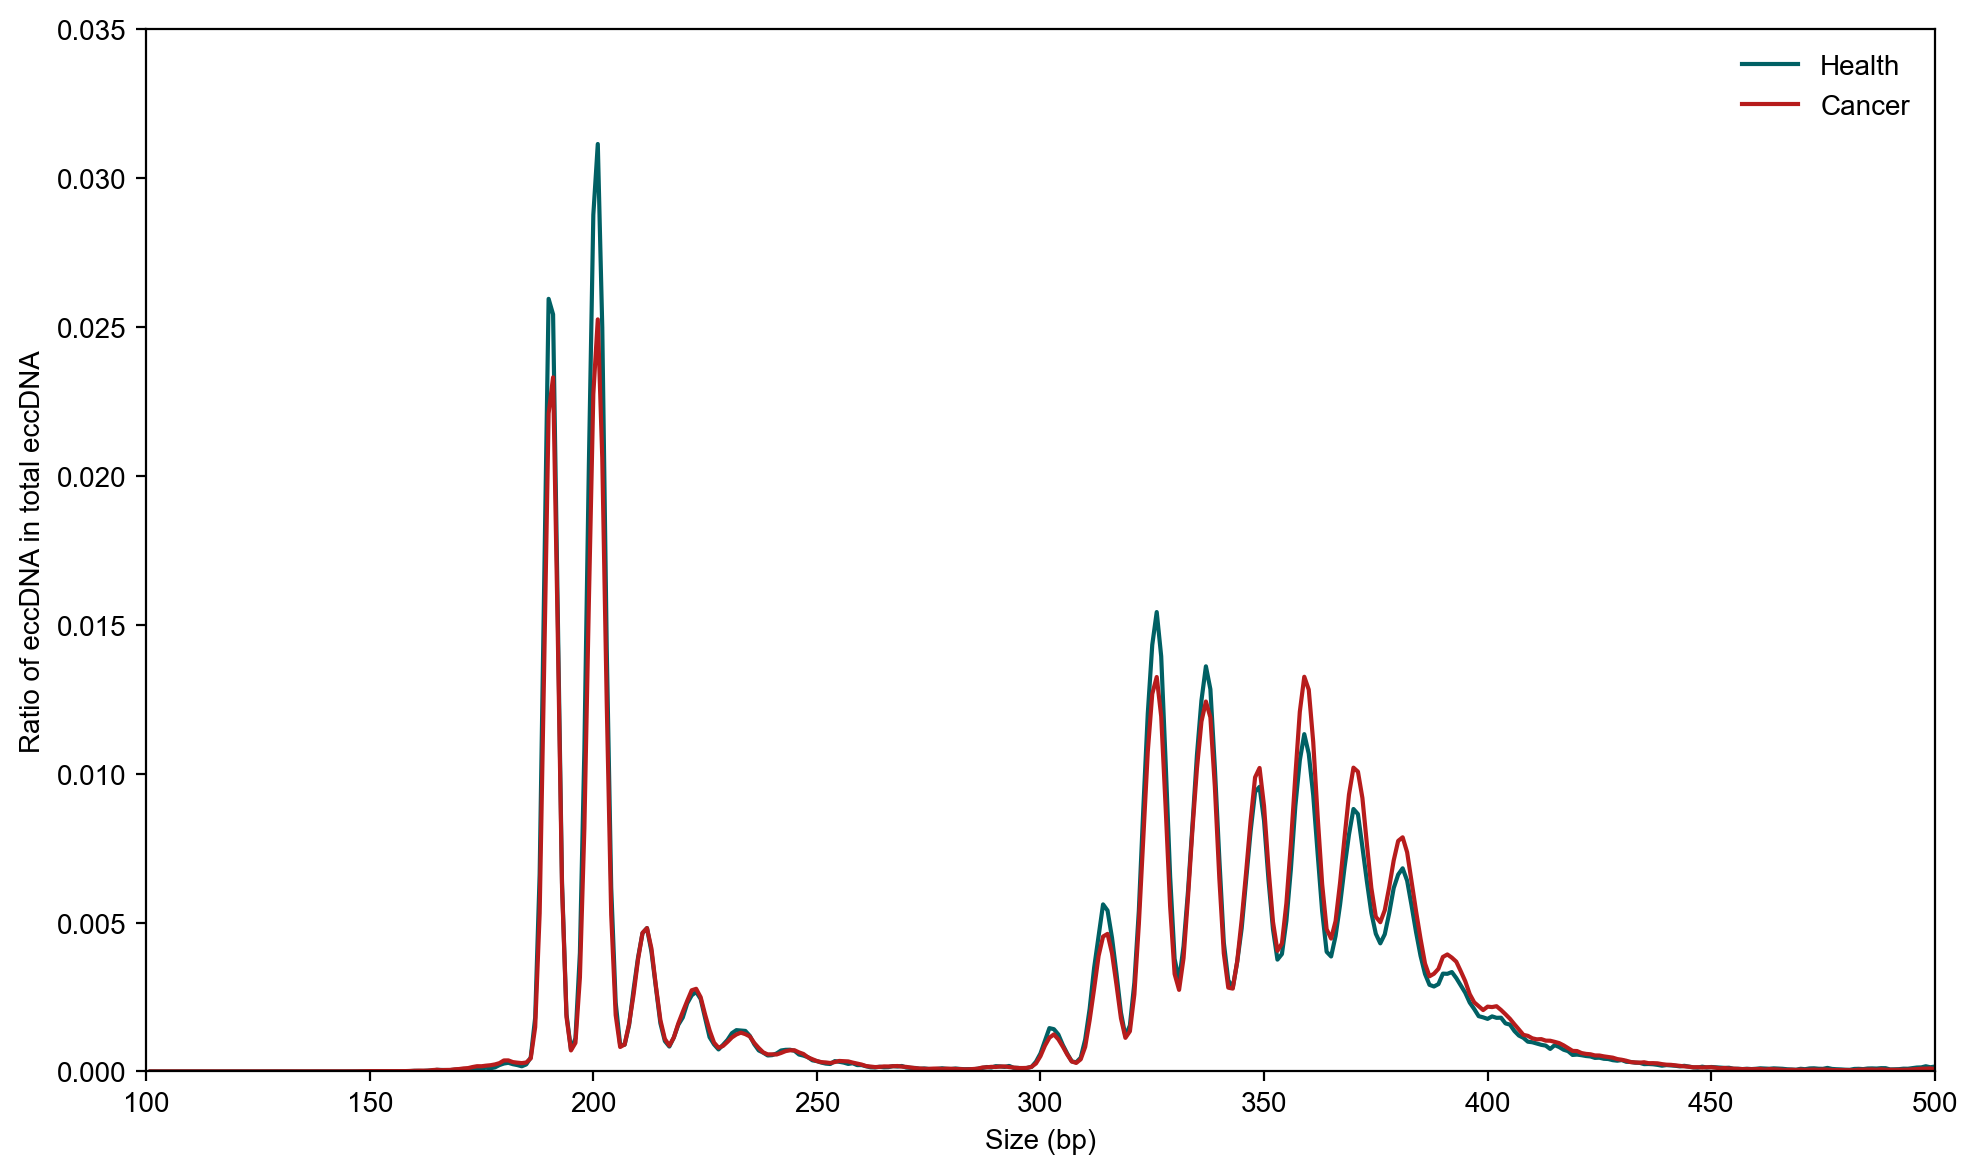

In [11]:
figsF2C = plt.figure(figsize = (10,6))
ax21 = plt.subplot(1,1,1)

sns.lineplot(data=templengthCount_nor,x="Length",y="Ratio",label='Health',ax = ax21,color='#006064')
sns.lineplot(data=templengthCount_dis,x="Length",y="Ratio",label='Cancer',ax = ax21,color ='#b71c1c')
ax21.set_xlabel('Size (bp)')
ax21.set_ylabel('Ratio of eccDNA in total eccDNA')
ax21.set_xlim([100, 500])
ax21.set_ylim([0.000, 0.035])

#plt.title("sFigure2A")

# 设置图例并调整颜色方块宽度
legend = ax21.legend(handlelength=2, frameon=False)

# 保存为 PDF 格式
plt.tight_layout()
#plt.savefig("/home/luosongwen/scantecc/2025_03_10_Figure_result/candidate_figure/Sfigure2C_eccDNA_length_distribution.pdf")

# 显示图像
plt.show()

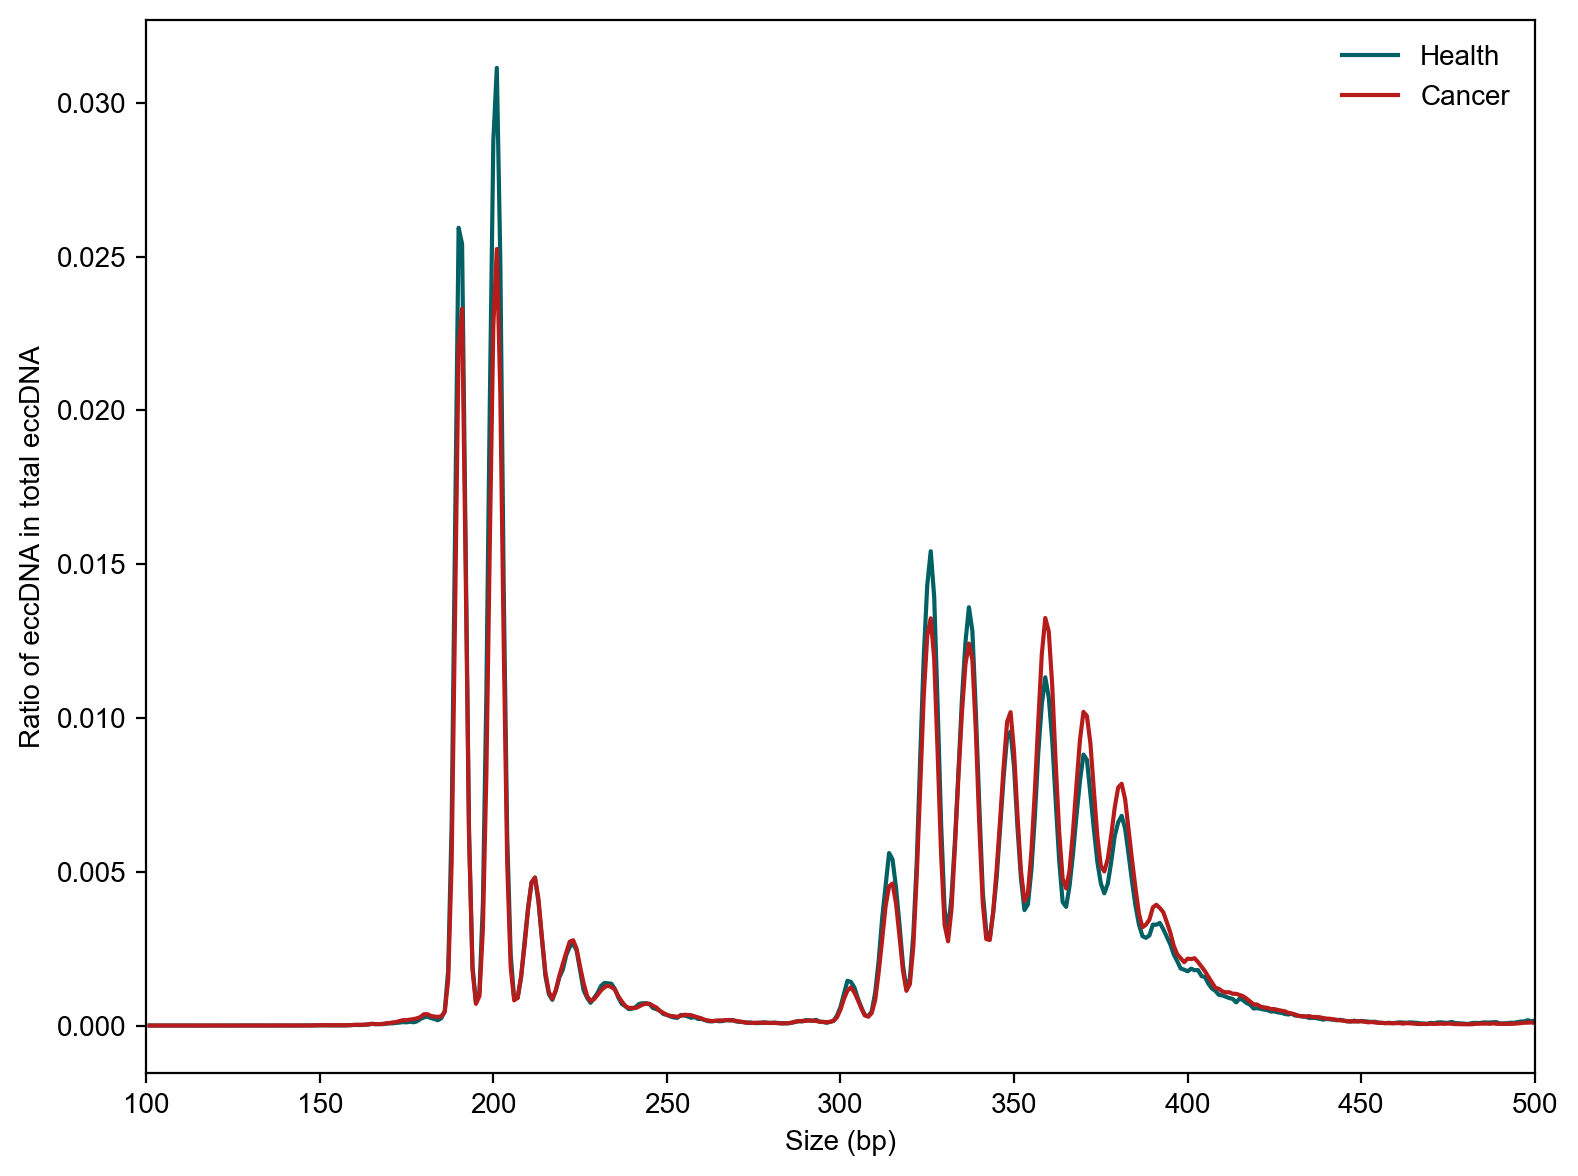

In [12]:
figsF2C = plt.figure(figsize = (8,6))
ax21 = plt.subplot(1,1,1)

sns.lineplot(data=templengthCount_nor,x="Length",y="Ratio",label='Health',ax = ax21,color='#006064')
sns.lineplot(data=templengthCount_dis,x="Length",y="Ratio",label='Cancer',ax = ax21,color ='#b71c1c')
ax21.set_xlabel('Size (bp)')
ax21.set_ylabel('Ratio of eccDNA in total eccDNA')
ax21.set_xlim([100, 500])

#plt.title("sFigure2A")

# 设置图例并调整颜色方块宽度
legend = ax21.legend(handlelength=2, frameon=False)

# 保存为 PDF 格式
plt.tight_layout()
#plt.savefig("/home/luosongwen/scantecc/2025_03_10_Figure_result/candidate_figure/Sfigure2C_eccDNA_length_distribution.pdf")

# 显示图像
plt.show()

Text(0.5, 1.0, 'sFigure2C')

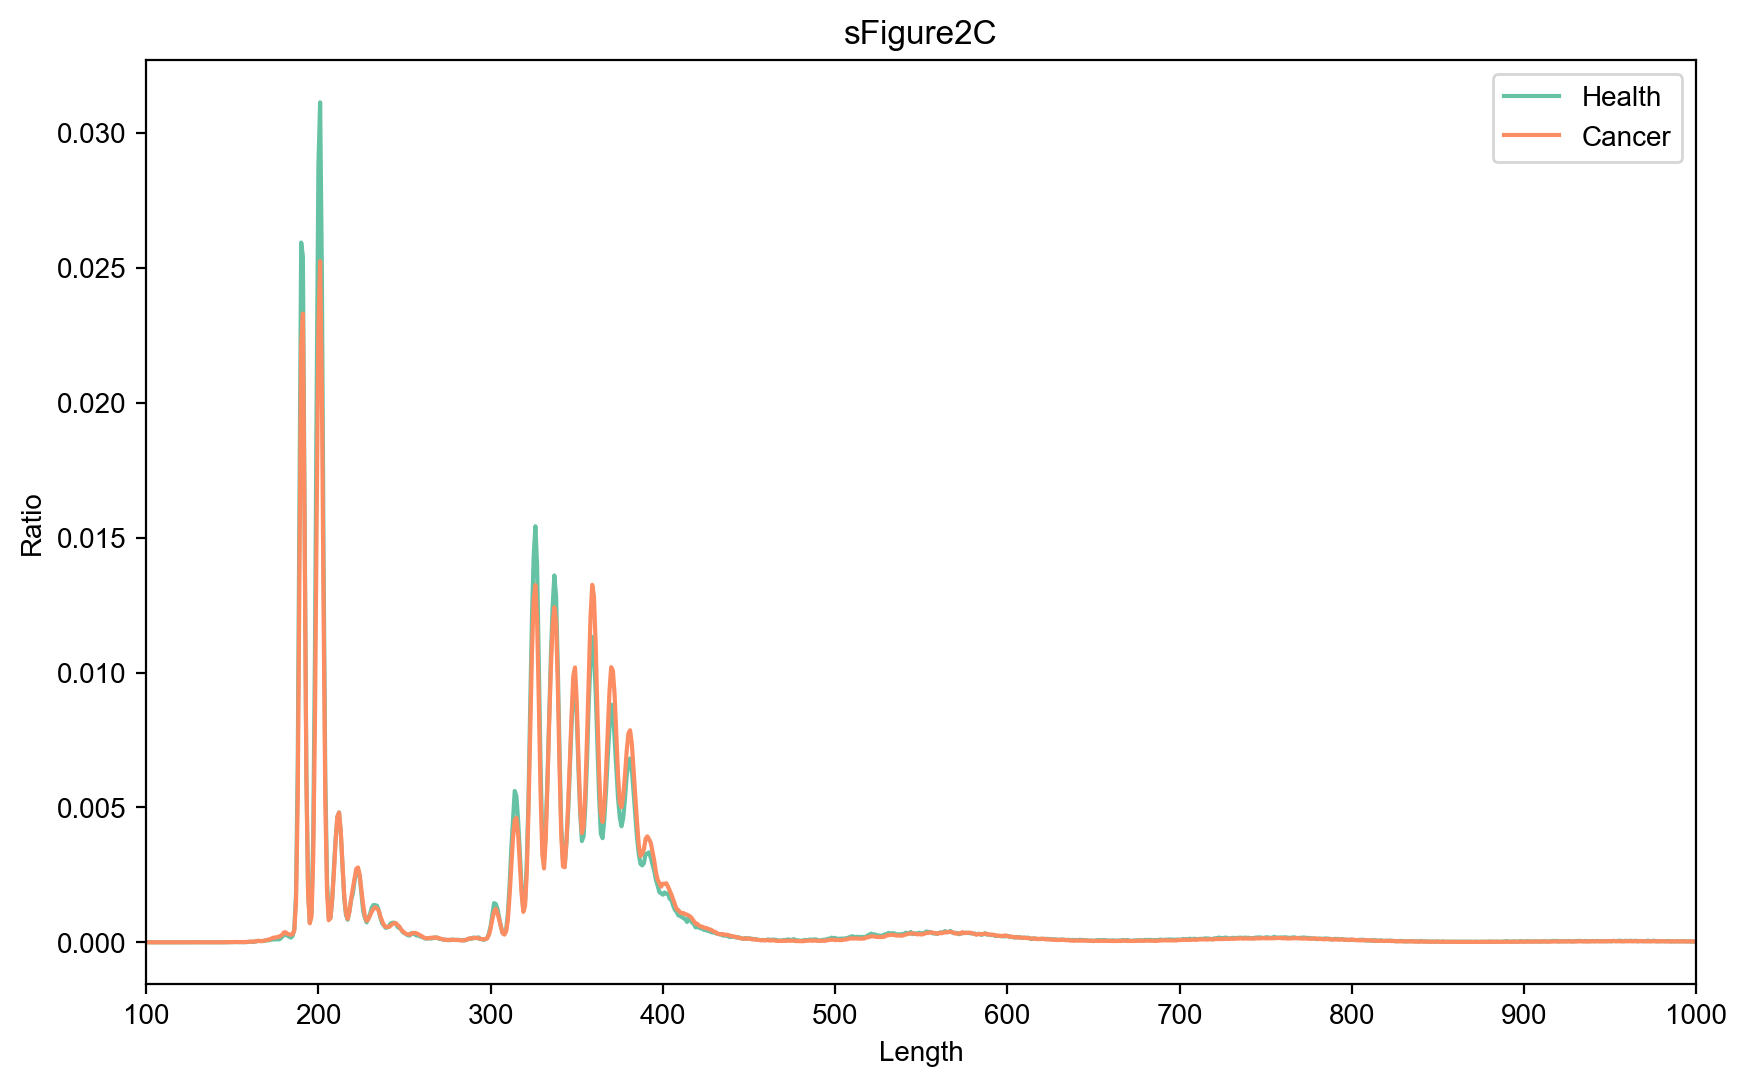

In [13]:
figsF2C = plt.figure(figsize = (10,6))
ax21 = plt.subplot(1,1,1)

sns.lineplot(data=templengthCount_nor,x="Length",y="Ratio",label='Health',ax = ax21,color='#66c2a5')
sns.lineplot(data=templengthCount_dis,x="Length",y="Ratio",label='Cancer',ax = ax21,color ='#fc8d62')
ax21.set_xlim([100, 1000])

plt.title("sFigure2C")

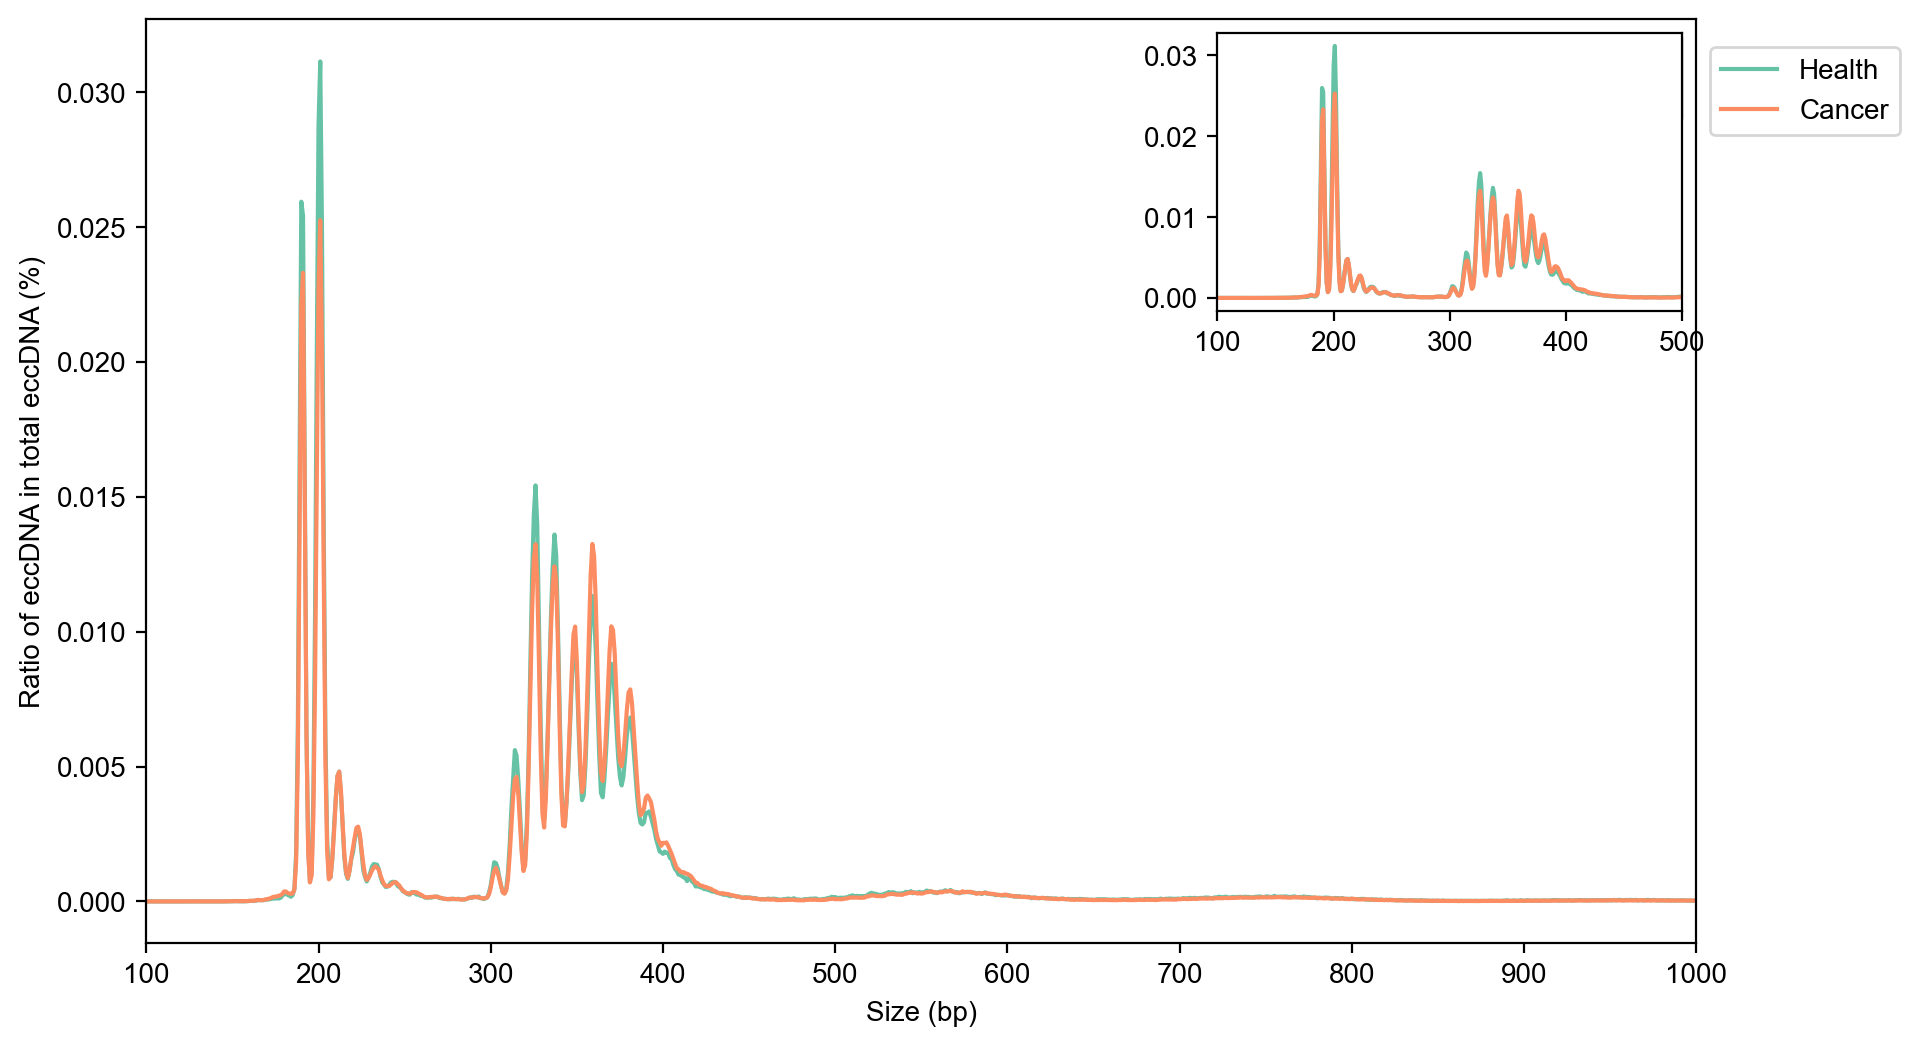

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

figsF2C = plt.figure(figsize=(10, 6))
ax21 = plt.subplot(1, 1, 1)

# 绘制主图
sns.lineplot(data=templengthCount_nor, x="Length", y="Ratio", label='Healthy', ax=ax21, color='#66c2a5')
sns.lineplot(data=templengthCount_dis, x="Length", y="Ratio", label='Cancer', ax=ax21, color='#fc8d62')
ax21.set_xlabel('Size (bp)')
ax21.set_ylabel('Ratio of eccDNA in total eccDNA (%)')

# 设置主图的x轴范围
ax21.set_xlim([100, 1000])


# 创建嵌套图
axins = inset_axes(ax21, width="30%", height="30%", loc="upper right")  # 位置可调整
sns.lineplot(data=templengthCount_nor, x="Length", y="Ratio", label='Health', ax=axins, color='#66c2a5')
sns.lineplot(data=templengthCount_dis, x="Length", y="Ratio", label='Cancer', ax=axins, color='#fc8d62')
axins.set_xlabel('')
axins.set_ylabel('')

# 设置嵌套图的x轴范围
axins.set_xlim([100, 500])

# 添加缩放框，表示嵌套图区域
#from mpl_toolkits.axes_grid1.inset_locator import mark_inset
#mark_inset(ax21, axins, loc1=2, loc2=4, fc="none", ec="0.5")

# 设置标题
#plt.title("sFigure2A")
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
# 显示图形
plt.show()